Q&A Activity – Week 07

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [28]:
data =pd.read_csv("dataset w7.csv")
data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


1. Carry out descriptive analytics on the dataset

In [29]:
data.shape

(28, 3)

In [30]:
list(data.columns.values)

['Gender', 'Test preparation', 'Total Marks']

In [31]:
data.dtypes

Gender              object
Test preparation    object
Total Marks          int64
dtype: object

In [32]:
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [33]:
data.describe(include=['object'])

,Gender,Test preparation
count,28,28
unique,2,2
top,female,none
freq,16,21


In [34]:
data['Gender'].value_counts().to_frame()

,Gender
female,16
male,12


In [35]:

median1=data['Total Marks'].median()
print("Median of Total Marks ",median1)
mode1=data['Total Marks'].mode()
print("Mode of Total Marks ",mode1)
var1 =data['Total Marks'].var()
print("Variance of Total Marks ",var1)

Median of Total Marks  33.0
Mode of Total Marks  0    14
1    18
2    27
3    28
4    41
5    43
6    44
7    48
Name: Total Marks, dtype: int64
Variance of Total Marks  155.11507936507937


In [36]:
data1 =data.groupby('Gender').describe()
data1

Total Marks                                                      
             count       mean        std   min    25%   50%    75%   max
Gender                                                                  
female        16.0  33.750000  12.865976  12.0  25.50  39.0  43.50  50.0
male          12.0  30.416667  12.168950  14.0  21.75  29.0  43.25  47.0

Gender
female    540
male      365
Name: Total Marks, dtype: int64


Text(0.5, 1.0, 'Gender wise total marks')

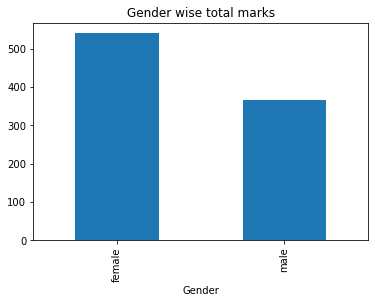

In [37]:
data1 =data.groupby('Gender')['Total Marks'].sum()
print(data1)
data1.plot(kind='bar')
plt.title("Gender wise total marks")

In [38]:
data2 =data.groupby('Test preparation').describe()
data2

Total Marks                                                \
                       count       mean        std   min   25%   50%   75%   
Test preparation                                                             
completed                7.0  44.571429   3.359422  40.0  43.0  44.0  46.0   
none                    21.0  28.238095  11.661495  12.0  18.0  27.0  38.0   

                        
                   max  
Test preparation        
completed         50.0  
none              48.0

Test preparation
completed    312
none         593
Name: Total Marks, dtype: int64


<AxesSubplot:title={'center':' Test preparation wise total marks'}, xlabel='Test preparation'>

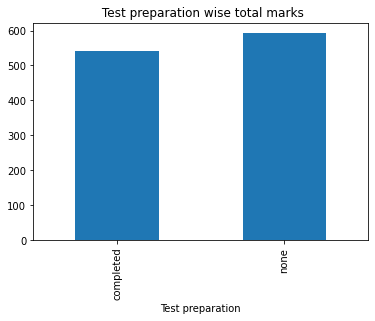

In [39]:
data2 =data.groupby('Test preparation')['Total Marks'].sum()
print(data2)
data1.plot(kind='bar')
plt.title(" Test preparation wise total marks")
data2.plot(kind='bar')

2. Check whether female and male students scored the same marks.

In [40]:
#H0:female and male students scored different marks.
#H1:female and male students scored the same marks.

In [41]:
from scipy.stats import ttest_ind

In [42]:
female=data[data['Gender'] == 'female']['Total Marks']
male=data[data['Gender'] =='male']['Total Marks']

In [43]:
alpha=0.05

In [44]:
_,p = ttest_ind(female,male)


In [45]:
print("P Value : ",p)

P Value :  0.4937822317960763


In [46]:
if p > alpha:
    print("Failing to reject the  Null hypothesis H0")
else:
    print("Rejecting the Null hypothesis H0")

Failing to reject the  Null hypothesis H0


From this test we can conclude that female and male students scored different marks.

3. Whether test preparation helps the students?

In [47]:
#H0:test preparation  didnot help the students
#H1: test preparation helped students

In [48]:
none=data[data['Test preparation'] == 'none']['Total Marks']
completed=data[data['Test preparation'] =='completed']['Total Marks']

In [49]:
alpha=0.05

In [50]:
_,p = ttest_ind(none,completed)

In [51]:
print("P Value : ",p)

P Value :  0.0012671292457320106


In [52]:
if p > alpha:
    print("Failing to reject the  Null hypothesis H0")
else:
    print("Rejecting the Null hypothesis H0")

Rejecting the Null hypothesis H0


From here we can conclude that 
test preparation helped students